In [26]:
%%markdown
# 2. Feature Engineering:

# 2. Feature Engineering:


In [11]:
#  Create a new feature by binning a numerical variable into categories (e.g., low, medium, high). Put ranges (eg age, into three or four groups rather than a continuous distribution)

import pandas as pd
df = pd.read_csv('../resources/tested.csv')

bins = [0, 30, 60, df['Age'].max()]
labels = ['Low', 'Medium', 'High']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

print(df[['Age', 'Age_Group']].head())

    Age Age_Group
0  34.5    Medium
1  47.0    Medium
2  62.0      High
3  27.0       Low
4  22.0       Low


In [12]:
# Implement one-hot encoding for a categorical variable.

encoded_df = pd.get_dummies(df, columns=['Age_Group'])
print(encoded_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  Age_Group_Low  Age_Group_Medium  \
0   330911   7.8292   NaN        Q          False              True   
1   363272   7.0000   NaN        S          False              True   
2   240276   9.6875   NaN        Q          False             False   
3   315154   8.6625   Na

In [13]:
%%markdown
# 2. Descriptive Statistics:

# 2. Descriptive Statistics:


In [14]:
# Calculate the mean, median, mode, and standard deviation of a numerical features.

numerical_df = df.select_dtypes(include=['number'])

mean_values = numerical_df.mean()
median_values = numerical_df.median()
std_deviation = numerical_df.std()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_deviation)

Mean Values:
 PassengerId    1100.500000
Survived          0.363636
Pclass            2.265550
Age              30.272590
SibSp             0.447368
Parch             0.392344
Fare             35.627188
dtype: float64

Median Values:
 PassengerId    1100.5000
Survived          0.0000
Pclass            3.0000
Age              27.0000
SibSp             0.0000
Parch             0.0000
Fare             14.4542
dtype: float64

Standard Deviation:
 PassengerId    120.810458
Survived         0.481622
Pclass           0.841838
Age             14.181209
SibSp            0.896760
Parch            0.981429
Fare            55.907576
dtype: float64


In [15]:
#  For categorical features, count the frequency of each category.

categorical_df = df.select_dtypes(include=['object', 'category'])

for column in categorical_df.columns:
    print(f"Frequency of categories in {column}:")
    print(categorical_df[column].value_counts())
    print("\n")
    

Frequency of categories in Name:
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64


Frequency of categories in Sex:
Sex
male      266
female    152
Name: count, dtype: int64


Frequency of categories in Ticket:
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64


Frequency of categories in Cabin:
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1


In [16]:
%%markdown

# 3. Visualization:


# 3. Visualization:


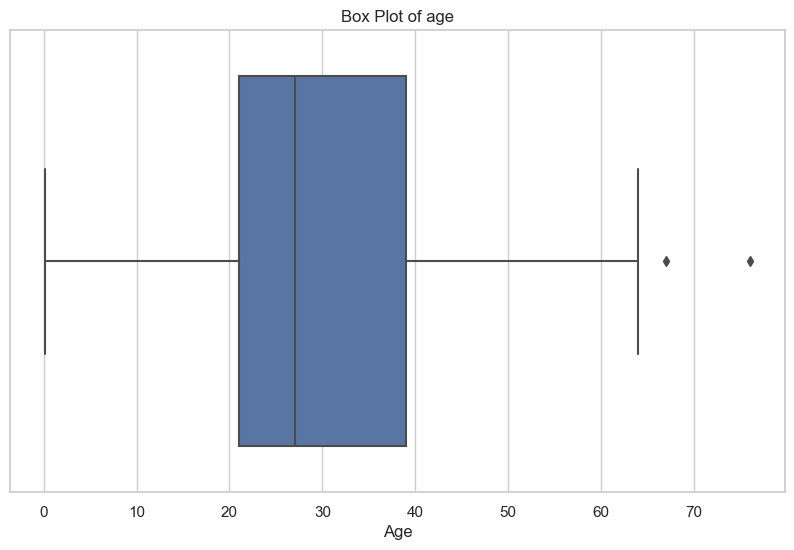

In [23]:
#  Use seaborn to create box plots for numerical features to identify outliers.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Age"])
plt.title(f'Box Plot of age')
plt.show()


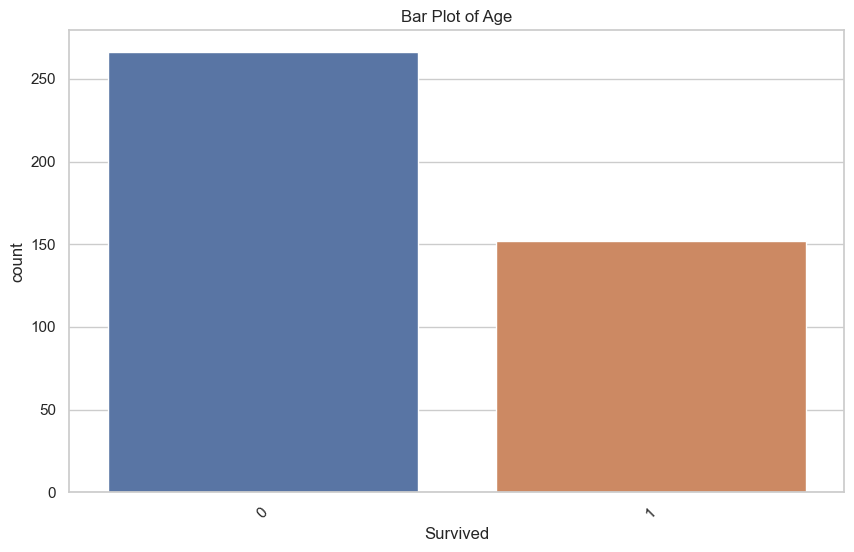

In [25]:
#  Visualize the distribution of categorical features using bar plots

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(10, 6))
sns.countplot(x="Survived", data=df)
plt.title(f'Bar Plot of Age')
plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
plt.show()